# HuggingFace Transformers: Part 1

**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. What are HuggingFace Transformers?
2. How Pre-trained Tokenizers Works?
3. Python implementation of Huggingface and Pytorch/Tensorflow.

**-----------------------------------------------------------------------------------------------------------------**

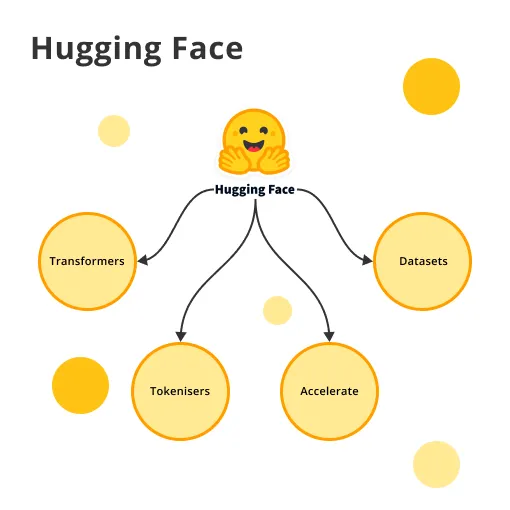

## Hugging Face 

* is an AI community and Machine Learning platform created in 2016 by Julien Chaumond, Clément Delangue, and Thomas Wolf. It aims to democratize NLP by providing Data Scientists, AI practitioners, and Engineers immediate access to over 20,000 pre-trained models based on the state-of-the-art transformer architecture. These models can be applied to:

Text in over 100 languages for performing tasks such as classification, information extraction, question answering, generation, generation, and translation. 

* **Speech**, for tasks such as object audio classification and speech recognition. 
* **Vision** for object detection, image classification, segmentation.
* **Tabular** data for regression and classification problems. 
* **Reinforcement** Learning transformers. 

* 🤗 Transformers provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

These models can be applied on:

* 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, and text generation, in over 100 languages.
* 🖼️ Images, for tasks like image classification, object detection, and segmentation.
* 🗣️ Audio, for tasks like speech recognition and audio classification.

Resource: https://huggingface.co/docs/transformers/main/en/index

* **Pipeline** allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.
  
* Hugging Face being a hub for shared models contains thousands of pre-trained models. You can use these models using the most basic object in the Transformers library called the pipeline() function.

## HuggingFace Transformers

In [54]:
from transformers import pipeline

In [55]:
sentiment_classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [56]:
sentiment_classifier("I'm so excited to join Teleperformance comapny as Data Engineer")

[{'label': 'POSITIVE', 'score': 0.9990217685699463}]

In [57]:
ner = pipeline("ner", model = "dslim/bert-base-NER")
# References: https://huggingface.co/dslim/bert-base-NER

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [58]:
ner("Her name is Anna and she works in New York City for Morgan Stanley")

[{'entity': 'B-PER',
  'score': 0.9954881,
  'index': 4,
  'word': 'Anna',
  'start': 12,
  'end': 16},
 {'entity': 'B-LOC',
  'score': 0.99960667,
  'index': 9,
  'word': 'New',
  'start': 34,
  'end': 37},
 {'entity': 'I-LOC',
  'score': 0.9993955,
  'index': 10,
  'word': 'York',
  'start': 38,
  'end': 42},
 {'entity': 'I-LOC',
  'score': 0.9995803,
  'index': 11,
  'word': 'City',
  'start': 43,
  'end': 47},
 {'entity': 'B-ORG',
  'score': 0.9957462,
  'index': 13,
  'word': 'Morgan',
  'start': 52,
  'end': 58},
 {'entity': 'I-ORG',
  'score': 0.9979346,
  'index': 14,
  'word': 'Stanley',
  'start': 59,
  'end': 66}]

In [59]:
ner("I'm so excited to join Teleperformance comapny as Data Engineer")

[{'entity': 'B-ORG',
  'score': 0.98671883,
  'index': 8,
  'word': 'Tel',
  'start': 23,
  'end': 26},
 {'entity': 'I-ORG',
  'score': 0.9585193,
  'index': 9,
  'word': '##eper',
  'start': 26,
  'end': 30},
 {'entity': 'I-ORG',
  'score': 0.96047777,
  'index': 10,
  'word': '##form',
  'start': 30,
  'end': 34},
 {'entity': 'I-ORG',
  'score': 0.63581306,
  'index': 11,
  'word': '##ance',
  'start': 34,
  'end': 38}]

In [60]:
zeroshot_classifier = pipeline("zero-shot-classification", model = "facebook/bart-large-mnli")

Device set to use cpu


In [44]:

# References: https://huggingface.co/facebook/bart-large-mnli
# Other Pipelines: https://huggingface.co/docs/transformers/en/main_classes/pipelines

In [61]:
sequence_to_classify = "one day I will join Teleperformance as Machine Learning Engineer"
candidate_labels = ['travel', 'cooking', 'dancing']

In [62]:
zeroshot_classifier(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will join Teleperformance as Machine Learning Engineer',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.6583278775215149, 0.19167201220989227, 0.15000011026859283]}

In [63]:
sequence_to_classify = "My aim is to sing songs for Lord Jesus"
candidate_labels = ['devotion', 'sports', 'travel','dancing']

In [64]:
zeroshot_classifier(sequence_to_classify, candidate_labels)

{'sequence': 'My aim is to sing songs for Lord Jesus',
 'labels': ['devotion', 'travel', 'dancing', 'sports'],
 'scores': [0.9714464545249939,
  0.010035861283540726,
  0.009836986660957336,
  0.008680731058120728]}

*=====================================================================*

# HuggingFace Transformers: Part 2

## Pre-trained Tokenizers

In [45]:
# The first step of the pipeline is to tokenize our input text.

# So to do this, we want to import the auto tokenizer from the Transformers package.

# Next we need to specify the model we want to use.

# This will ensure the tokenizer tokenizes in a way that is suitable for our intended model.

# Different models will have slightly different ways of creating their tokenization.

# So we're going to be specifying our model and we'll be using Bert Base Uncased.

In [65]:
from transformers import AutoTokenizer

## What is AutoTokenizer?
* AutoTokenizer is a special class in the Huggingface Transformers library.
* It helps you choose the right tokenizer for your model without knowing the details.
* Think of it as a smart assistant that knows which tool to use for the job.
* The AutoTokenizer is easy to use. You don’t have to remember which tokenizer goes with which model.
* It ensures you use the correct tokenizer for the model, reducing errors and improving consistency.

In [66]:
model = "bert-base-uncased"

In [67]:
tokenizer = AutoTokenizer.from_pretrained(model)

In [68]:
sentence = "I'm so excited to be learning about Teleperformance Pvt Ltd"

In [69]:
input_ids = tokenizer(sentence)
print(input_ids)

{'input_ids': [101, 1045, 1005, 1049, 2061, 7568, 2000, 2022, 4083, 2055, 10093, 13699, 2121, 14192, 6651, 26189, 2102, 5183, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [70]:
tokens = tokenizer.tokenize(sentence)

In [71]:
print(tokens)

['i', "'", 'm', 'so', 'excited', 'to', 'be', 'learning', 'about', 'tel', '##ep', '##er', '##form', '##ance', 'pv', '##t', 'ltd']


In [72]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)



#### These tokens are then converted into a numerical value based on a predefined vocabulary specific to the model.

In [73]:
print(token_ids)

[1045, 1005, 1049, 2061, 7568, 2000, 2022, 4083, 2055, 10093, 13699, 2121, 14192, 6651, 26189, 2102, 5183]


In [74]:
decoded_ids = tokenizer.decode(token_ids)
print(decoded_ids)

i ' m so excited to be learning about teleperformance pvt ltd


In [75]:
tokenizer.decode(101)
# this is special tokens for beginning of sentence "classification"

'[CLS]'

In [77]:
tokenizer.decode(102)

'[SEP]'

In [76]:

# this is special tokens for "separator"

# The CLS token is usually placed at the beginning of the input, and the Sep token is used to separate

# different segments of text.

# The masked token is used in tasks related to masked Automatic language modeling or text generation with

# a blank to fill in.

# For instance, if you're using the model for translation, you might have a special token like source

# and target to indicate the source and target languages, respectively.

# These tokens help guide the model's behavior during the translation.

# When you feed multiple sentences of varying lengths into the model, you may need special tokens for

# padding, which is where we add extra tokens to make sure all the inputs are the same length.

'[SEP]'

In [78]:

model2 = "xlnet-base-cased"
# Let's look at how Xlnet, another large language model, differs in its tokenization.

# So let's specify our model as Xlnet base cased.

In [79]:
tokenizer2 = AutoTokenizer.from_pretrained(model2)

In [80]:
input_ids = tokenizer2(sentence)

In [81]:
print(input_ids)

{'input_ids': [35, 26, 98, 102, 5564, 22, 39, 1899, 75, 9690, 20428, 395, 1232, 46, 3921, 4, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [82]:
tokens = tokenizer2.tokenize(sentence)
print(tokens)

['▁I', "'", 'm', '▁so', '▁excited', '▁to', '▁be', '▁learning', '▁about', '▁Tele', 'performance', '▁P', 'v', 't', '▁Ltd']


In [49]:

# Let's first look at how this model tokenizes differently to the Bert model above.

# We'll run tokenizer two dot tokenize over our sentence.

# When we print this out, you can see that even just the way that this model has tokenized, the text

# looks very different to what we saw above.

# We can then convert these tokens to their ID values.

# So we'll use tokenizer to convert tokens to IDs over our tokens.

# And when we print this out, you can see that the numbers given to each of the tokens differs.

# Again from the Bert model above.

# You might also notice that where the Bert model started the input IDs with the CLS special token Xlnet

In [83]:
token_ids = tokenizer2.convert_tokens_to_ids(tokens)
print(token_ids)

[35, 26, 98, 102, 5564, 22, 39, 1899, 75, 9690, 20428, 395, 1232, 46, 3921]


In [84]:
tokenizer2.decode(4)

'<sep>'

In [85]:
tokenizer2.decode(3)

'<cls>'

## Huggingface and Pytorch/Tensorflow

In [86]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [87]:
print(sentence)
print(input_ids)

I'm so excited to be learning about Teleperformance Pvt Ltd
{'input_ids': [35, 26, 98, 102, 5564, 22, 39, 1899, 75, 9690, 20428, 395, 1232, 46, 3921, 4, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [88]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Refrences: https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english


In [89]:
input_ids_pt = tokenizer(sentence, return_tensors ="pt")

# And we'll use our tokenizer over our sentence.

# And we want to specify return tensors equals 'pt'.

# This will return our input ids as a PyTorch tensor.

# We can print these out to check it has worked.

print(input_ids_pt)

{'input_ids': tensor([[  101,  1045,  1005,  1049,  2061,  7568,  2000,  2022,  4083,  2055,
         10093, 13699,  2121, 14192,  6651, 26189,  2102,  5183,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [90]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [91]:
with torch.no_grad():
    logits = model(**input_ids_pt).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

# We then want to return the label of positive or negative for our input texts.

# So we'll get our predicted class ID and to use this we'll take argmax item.

# And then we take our model.config.id to label all this predicted class id.

'POSITIVE'

## Saving and loading models

In [95]:
model_directory_ = "my_saved_models_"
# this will create a folder with name "my_saved_models"
# check left pane

In [96]:
tokenizer.save_pretrained(model_directory_)

('my_saved_models_\\tokenizer_config.json',
 'my_saved_models_\\special_tokens_map.json',
 'my_saved_models_\\vocab.txt',
 'my_saved_models_\\added_tokens.json',
 'my_saved_models_\\tokenizer.json')

In [97]:
model.save_pretrained(model_directory_)